### This code is by no means original and is heavily based on https://www.tensorflow.org/tutorials/keras/classification. It serves as the "Hello World" programming example for a neural network

###############################################################################################################################
### Importing ###
###############################################################################################################################

We first need to import all the tools which have made ML easy in the last few years:

In [2]:
import tensorflow as tf #Tensorflow has made ML simple
from tensorflow import keras #Keras makes using tensorflow even easier!
import numpy as np #Everything needs numpy
import matplotlib.pyplot as plt #For plotting
print(tf.__version__) # Check we are running tensorflow version >2.0 (there were major changes between 1.x and 2.x)
import seaborn as sns #makes plotting prettier, optional

2.3.1


###############################################################################################################################
### Data loading and normalisation ###
###############################################################################################################################

Keras comes with some datasets which have been curated for us. In this example we are using 70,000 greyscale images of different fashion items (an alternative to character recognition). There are 10 different catagories and the dataset even comes with its own data loader.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

We now define our class names, these are for our benefit so we know what the numerical labels mean

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Lets inspect the data a bit

In [5]:
print("Size of training set = ", train_images.shape)
print("First label = ", train_labels[0])
print("Size of label set = ", train_labels.shape)

Size of training set =  (60000, 28, 28)
First label =  9
Size of label set =  (60000,)


The dataset has been split into 60,000 training images and 10,000 test images --> Note no validation here (yet)
We can tell that each image is 28x28 pixels (not high resolution, but you will see why shortly)

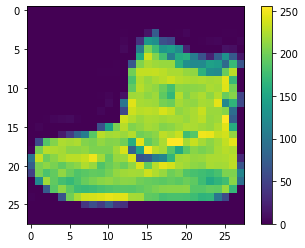

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

We now see that, as expected, the first entry in the dataset is an "Ankle boot", but what actually is this image?

In [7]:
# Inspect some pixels:
print("Corner pixel = ",train_images[0][0,0])
print("A middle pixel = ", train_images[0][10,20])

Corner pixel =  0
A middle pixel =  210


In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

We want to normalise these pixel values to be [0,1] rather than [0,255]

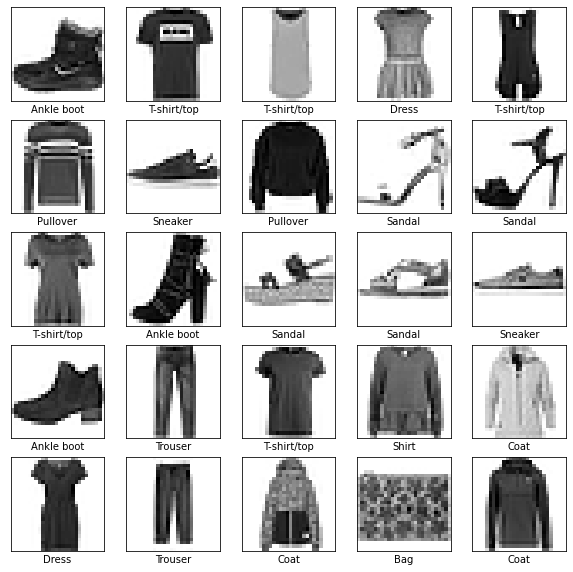

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

###############################################################################################################################
### Building a network! ###
###############################################################################################################################

In [10]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
                         ])

###############################################################################################################################
### Training the network ###
###############################################################################################################################

In [11]:
model.compile(optimizer="ADAM",
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"]) #This is the one hint in this example that keras/tensorflow is not just straight python. 
# We must compile the model before we run it

In [12]:
model.summary() #A nice summary to show us how big our network is, and how many parameters it has 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(train_images, train_labels, epochs=10) #Now we set it training, you will see why we set this as a variable soon

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4944 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3734 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3352 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3106 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2957 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2801 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2492 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

##### Notice that the more we train the better our accuracy becomes!

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 738us/step - loss: 0.3448 - accuracy: 0.8802
Test Accuracy: 0.8802000284194946


#### But our test accuracy is not as good 

###############################################################################################################################
### Examine the training ###
###############################################################################################################################

In [15]:
#We can look at the history of the training
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

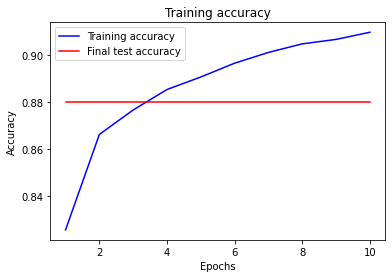

In [16]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1) #Giving us something to plot against

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, test_acc*np.ones(len(epochs)), 'r', label='Final test accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Why is the gap between training and test accuracy increasing?

###############################################################################################################################
### Examine the predictions ###
###############################################################################################################################

In [17]:
predictions = model.predict(test_images)
print(predictions[0])
print(test_labels[0])

[1.1594787e-08 9.2221875e-10 7.2492035e-10 1.0734772e-10 4.2844337e-09
 2.3391023e-03 7.0184840e-09 1.0305443e-02 3.6772754e-08 9.8735541e-01]
9


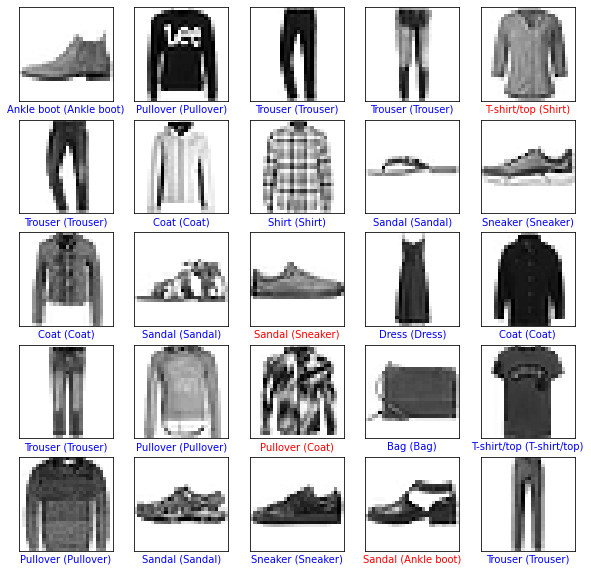

In [18]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red. True labels are in brackets
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

###############################################################################################################################
### Enable single predictions ###
###############################################################################################################################

To test a single image we see that is it (as expected) a 28x28 pixel object

In [19]:
img = test_images[0]
print(img.shape)

(28, 28)


However, to use model.predict we need to make it a collection (of one), so we give it an extra dimension 

In [20]:
img = np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


In [21]:
#Now we can predict on this:
predictions = model.predict(img)
print(predictions)

[[1.1594810e-08 9.2222230e-10 7.2492168e-10 1.0734772e-10 4.2844581e-09
  2.3391012e-03 7.0184840e-09 1.0305453e-02 3.6772821e-08 9.8735541e-01]]


Not exactly what we want still, so we just say that the most likely class is the one we choose. For more complex problems we are able to set thresholds here instead of a straight choice.

In [22]:
prediction = predictions[0]
print(class_names[np.argmax(prediction)])

Ankle boot


###############################################################################################################################
### Tasks ###
###############################################################################################################################

1. Play around with the network architecture and see if you can increase the accuracy for training and test: try a different optimizer, more/less epochs or more/less nodes or hidden layers (max 5 mins playing advised)

2. Split the training data into a training and validation set, then implement a validation step during training (hint look at the keras API documentation for model.fit - this step is easier than you think)

3. Plot the training and validation loss/accuracy with epoch

4. Change the prediction to admit when it doesn't really know (examine one it got wrong for example)

####Answers

1. Whatever

2. history = model.fit(train_images, train_labels, epochs=10, validation_split = 0.15)   #keras Does it all for you

3. 

history_dict = history.history
history_dict.keys() #To check what the names are


acc = history.history['accuracy']
loss = history.history['loss']
v_acc = history.history['val_accuracy']
v_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1) #Giving us something to plot against

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, v_acc, 'r', label='Validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

4. 
def predictor(input_image, threshold=0.6):
    input_image = np.expand_dims(input_image,0)
    predictions = model.predict(input_image)
    
    if (np.max(predictions) >= threshold):
        print("Prediction = ", class_names[np.argmax(prediction)])
    else:
        print("Not so sure could be", class_names[np.argmax(prediction)],  "but only" ,  np.max(predictions)*100,  "% sure")

predictor(test_images[4], threshold=0.2)